# Business Problem:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

Our main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. 

# Steps

1. Data understanding

   - Import Python libraries
   - Read and inspect data for understanding
   - Summary statistics
   - Analyse the columns


2. Exploratory Data Analysis

  - Null Value Analysis
  - Derive data – convert exports, imports, health from % of GDPP to absolute values
  - Data Visualization
    - Visualising Bivariate Distributions using pair plot
    - Visualising Correlation using heatmap
    - Visualising univariate distributions using Histogram and density plots
    - Visualising GDPP, income, child mortality and other parameters across countries using point plots and bar plots
    - Visualising univariate distributions using boxplots to identify outliers


3. Prepare data for modelling

  - Outlier Treatment
  - Hopkins test
  - Scaling


4. Build model using K-means

   - Metrics to choose the value of K
     - Elbow curve 
     - Silhouette Analysis
     - Iterating with different values of k and choose optimal k as optimal number of clusters
     - Country Segmentation
     - Cluster Profiling based on GDPP, Income and Child Mortality Rate
       - Scatter Plots
       - Box plots
       - Bar plots on the mean of the columns in each cluster
     - Identification of top 10 countries in need of aid.

5. Build model using Hierarchical clustering

  - Single linkage
  - Complete linkage
  
     - Country Segmentation
     - Cluster Profiling based on GDPP, Income and Child Mortality Rate
       - Scatter Plots
       - Box plots
       - Bar plots on the mean of the columns in each cluster
     - Identification of top 10 countries in need of aid.

6. Suggestions 

## 1.1 Import libraries

Ignore warnings and import necessary libraries:

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# To display data dictionary fully
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.color_palette("Set1")

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from matplotlib.pyplot import figure

## 1.2 Read and inspect data for understanding

Lets read the data dictionary into `data_dictionary` dataframe and understand the columns

In [3]:

data_dictionary = pd.read_csv('data-dictionary.csv')
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


There are total of `10 columns` in the actual dataset.

From the data dictionary, we can see that `exports`, `health` and `imports` are given as percentage of GDP. Hence we have to convert these columns to absolute values in the EDA section

Lets read the actual dataset into `country_df`

In [4]:
country_df = pd.read_csv('Country-data.csv')
country_df.head() # Checking the top 5 rows of the dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# checking botton 5 rows of the dataframe
country_df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [6]:
top_15 = ['Malta', 'Cyprus', 'New Zealand', 'United Arab Emirates', 'Brunei', 'Italy', 'Kuwait', 'United Kingdom', 'France', 'Germany', 'Iceland', 'Belgium', 'Japan', 'Finland', 'Singapore']
country_df = country_df[country_df.country.isin(top_15)]
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500


In [7]:
country_df.reset_index(inplace=True)
country_df.shape

(15, 11)

### Data Inspection:

Inspect the various aspects of the `country_df` dataframe such as 
- `shape` for number of rows and columns
- `size` for memory usage
- `info()` for the presence of null values
- `nunique()` for checking how many unique entries present in each column and any column is of categorical in nature.
- `nunique() and duplicated` for duplicates analysis
- `describe()` for statistical information

In [8]:
# Checking the shape of the dataframe
country_df.shape

(15, 11)

There are `167` rows and `10` columns in the given dataset.

In [9]:
# Checking the size of the dataframe
country_df.size

165

In [10]:
# Inspecting type
print(country_df.dtypes)

index           int64
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [11]:
# How many types of each data type column exists and total memory usage
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       15 non-null     int64  
 1   country     15 non-null     object 
 2   child_mort  15 non-null     float64
 3   exports     15 non-null     float64
 4   health      15 non-null     float64
 5   imports     15 non-null     float64
 6   income      15 non-null     int64  
 7   inflation   15 non-null     float64
 8   life_expec  15 non-null     float64
 9   total_fer   15 non-null     float64
 10  gdpp        15 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 1.4+ KB


`info` shows that there are no null values present. Still we will check in EDA section using `isnull()`

Also `info()` shows that apart from `country` column, all the columns are numerical and continuous in nature.

### Duplicates analysis

In [12]:
country_df.duplicated().sum()

0

In [13]:
# Checking the number of unique values each column possess to identify categorical columns
country_df.nunique().sort_values()

life_expec    13
total_fer     13
child_mort    14
imports       14
income        14
index         15
country       15
exports       15
health        15
inflation     15
gdpp          15
dtype: int64

`nunique()` shows that there are no categorical variables in the dataframe and all variables are numerical continuous variables.

Also there are `167` rows and `country` has `167` unique values which means the column **country** is unique in each row and hence there are no duplicate records

### Statistical summary

In [14]:
# Checking the numerical columns data distribution
country_df.describe()

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,80.266667,5.346667,63.420000,7.934667,55.180000,45680.000000,3.961467,80.260000,1.742667,38340.000000
std,43.992640,2.700494,50.634294,3.219163,47.098744,16978.987013,5.340131,1.849247,0.349519,6746.512326
min,15.000000,2.600000,15.000000,2.630000,13.600000,28300.000000,-1.900000,76.500000,1.150000,21100.000000
25%,53.500000,3.400000,29.250000,4.965000,28.050000,36000.000000,0.554500,79.950000,1.405000,35150.000000
50%,75.000000,4.200000,50.200000,9.400000,37.100000,38800.000000,1.880000,80.300000,1.860000,38900.000000
75%,104.500000,6.500000,71.900000,9.870000,60.550000,49350.000000,4.650000,81.550000,1.975000,43150.000000
max,158.000000,10.800000,200.000000,11.900000,174.000000,80600.000000,16.700000,82.800000,2.210000,46600.000000


Summary statistics from `describe()` indicates the presence of outliers. We can visualize the distribution and percentile of each column in Section 2.3 using boxplots

# 2. Exploratory Data Analysis (EDA)
## 2.1 Null Values Analysis

In [15]:
# Looking for any null value in any column 
print(country_df.isnull().sum())

index         0
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


Both `info()` and `isnull()` output indicate that there are no null values in the given dataset.

## 2.2 Derived Data

From the data dictionary in section 1, we saw that exports, health and imports are given as percentage of GDP. Hence we have to convert these columns to absolute values as clustering uses `Euclidean Distance` between values to group the countries

In [16]:
country_df.head() # Lets check data before conversion

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
1,23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
2,42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
3,53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
4,54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600


In [17]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head() # Lets check data after conversion

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
1,23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
2,42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800
3,53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
4,54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600


Now all the columns have absolute values and we can visualize the data for more understanding

# 3. Prepare the data for modelling
## 3.1 Outlier Treatment

Outliers can be treated in two ways:
1. Statistical treatment where all outliers can be either removed or capped. Since we have dataset of 167 rows, deleting outliers will remove the countries which might be in need of aid. 

2. Domain based outlier treatment:
Here we will cap or remove outliers based on the data's relevance to the business need. We will cap the outliers as discussed in the above section.

There are different ranges in capping the outliers:
- Soft range: 1th and 99th percentile.
- Mid range: 5th and 95th percentile.
- 25th and 75th percentile.

We will be doing **Soft capping** as the data points are few and the capping should not influence the clusters much.

In [18]:
higher_outlier_cols = ['exports','imports','health','income','total_fer','gdpp']

for col in higher_outlier_cols:
    Q4 = country_df[col].quantile(0.99) # Get 99th quantile
    country_df.loc[country_df[col] >= Q4, col] = Q4 # outlier capping

In [19]:
numerical_cols = list(country_df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['index',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [24]:
def boxplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in numerical_cols:
        if(i>9):
            break
        plt.subplot(3,3,i)
        sns.boxplot(y=country_df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

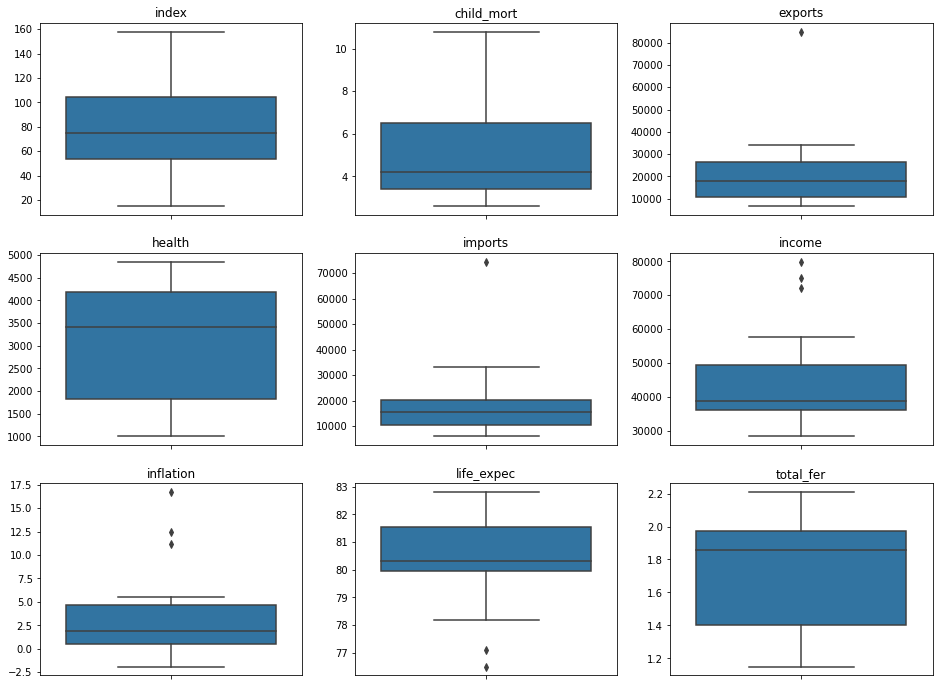

In [25]:
boxplot_for_outlier_analysis()

In [26]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,80.266667,5.346667,23261.841600,3073.056933,20075.939467,45629.600000,3.961467,80.260000,1.742573,38336.266667
std,43.992640,2.700494,19068.211662,1445.803754,17004.623842,16868.691188,5.340131,1.849247,0.349386,6741.628708
min,15.000000,2.600000,6675.000000,1002.520000,6052.000000,28300.000000,-1.900000,76.500000,1.150000,21100.000000
10%,30.600000,2.880000,9497.400000,1119.930000,9556.640000,32940.000000,0.100000,77.540000,1.372000,31960.000000
25%,53.500000,3.400000,10925.300000,1831.955000,10646.300000,36000.000000,0.554500,79.950000,1.405000,35150.000000
50%,75.000000,4.200000,17879.400000,3411.740000,15507.800000,38800.000000,1.880000,80.300000,1.860000,38900.000000
75%,104.500000,6.500000,26437.250000,4178.975000,20201.350000,49350.000000,4.650000,81.550000,1.975000,43150.000000
90%,147.400000,9.740000,33266.160000,4799.160000,32897.680000,73960.000000,11.980000,82.420000,2.188000,45520.000000
95%,157.300000,10.590000,49215.427200,4835.889200,45529.437600,76593.200000,13.760000,82.730000,2.202580,46303.200000


There are some outliers present in the data after outlier treatment as we have used soft capping. Lets proceed and cluster the countries based on the prepared data.

## 3.2 Hopkins test to understand cluster tendency

- Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not. This usually means the given data is not random. 

- The process to evaluate the data to check if the data is feasible for clustering or not is know as the **clustering tendency**. 

- To check cluster tendency, we use **Hopkins test.**

- `Hopkins test` examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [27]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [28]:
hopkins(country_df[numerical_cols])

0.9148903097561274

### Interpretation of Hopkins score:

- Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. 
- A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.


Hopkins test results will vary as it picks a set of samples each time. On running it multiple times, it can be seen that this data set gives Hopkins statistic value in the range of 0.86 to 0.97 and hence our dataset is good for clustering and lets proceed our analysis 

## 3.3 Scaling

- Feature scaling is essential for machine learning algorithms that calculate distances between data. 
- Most of distance based models e.g. k-means and Hierarchical clustering need standard scaling so that large-scaled features don't dominate the variation.
- If we do not scale, the feature with a higher value range starts dominating when calculating distances
- We have chosen `StandardScaler` as clustering does not work well when the variance differs a lot.

In [29]:
# Scaling on numerical features

scaler = StandardScaler() # instantiate scaler

country_df_scaled = scaler.fit_transform(country_df[numerical_cols]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
country_df_scaled = pd.DataFrame(country_df_scaled, columns = numerical_cols) # convert to dataframe
country_df_scaled

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.535653,-0.324527,0.578654,1.201151,0.796861,-0.277946,-0.403459,-0.145533,0.347891,0.931015
1,-1.347422,1.975271,0.028790,-1.482365,-0.620399,2.099467,2.469159,-1.768780,0.288638,-0.466183
2,-0.900372,-0.669497,-0.423428,-0.883674,-0.144018,-0.719753,-0.378260,-0.201507,-0.955663,-1.157106
3,-0.641555,-0.899477,-0.292180,0.760208,-0.170266,-0.357717,-0.699831,-0.145533,0.377517,1.207384
4,-0.618026,-0.439517,-0.672092,1.258855,-0.527595,-0.535667,-0.564341,0.638104,0.851537,0.347570
5,-0.523910,-0.439517,-0.302929,1.269569,-0.278070,-0.320899,-0.620940,-0.089558,-1.044542,0.531816
6,-0.288621,-1.052796,-0.048163,0.619671,-0.117679,-0.419079,0.292405,0.973948,1.355182,0.547170
7,-0.123919,-0.516177,-0.773017,0.242474,-0.629311,-0.578620,-0.706033,0.806026,-0.837158,-0.389414
8,-0.076861,-0.822817,-0.900400,0.823318,-0.853659,-0.603165,-1.136151,1.421741,-1.044542,0.946369
9,0.040783,2.090261,0.131240,-1.475185,-0.509613,1.814502,1.403073,-1.153065,1.380661,0.025139


# 4. Build model using K-means algorithm for clustering

Now that scaling is done on all numerical features, lets build the unsupervised model using clustering technique. There are many algorithms available in clustering. We will pick two common algorithms such as 
1. K-means algorithm
2. Hierachical Clustering

and build the model using both the methods and cluster the countries identify the countries in need

**Kmeans algorithm** is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.


## 4.1 Metrics to choose the value of K
The main challenge in this algorithm is to find the optimal value of k or `number of clusters`. There are two common approaches that help to find k:

1. Elbow method
2. Silhouette Analysis

### 4.1.1 Elbow Method

Elbow method gives us an idea on what a good k number of clusters would be based on the `sum of squared distance (SSD) ` between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

Lets use `KMeans()` from `sklearn` to form clusters of 2,3,4 and so on till 11 and calculate SSD and plot the number of clusters and SSD and see where the elbow is formed.

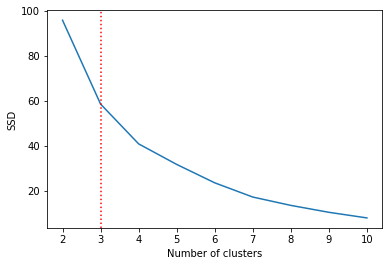

In [30]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

### INFERENCE:

SSD flattens and forms an elbow at 3 indicating that 3 is optimal value of k.

### 4.1.2 Silhouette Analysis

The silhouette score is a measure of how similar an object is to its own cluster (`cohesion`) compared to other clusters (`separation`).

Lets use `KMeans()` from `sklearn` to form clusters of 2,3,4 and so on till 11 and calculate `silhouette_score` and plot the `number of clusters` against `silhouette_score`

For k_clusters=2, the silhouette score is 0.385958
For k_clusters=3, the silhouette score is 0.419062
For k_clusters=4, the silhouette score is 0.319510
For k_clusters=5, the silhouette score is 0.269517
For k_clusters=6, the silhouette score is 0.222297
For k_clusters=7, the silhouette score is 0.230173
For k_clusters=8, the silhouette score is 0.194301
For k_clusters=9, the silhouette score is 0.166627
For k_clusters=10, the silhouette score is 0.122690


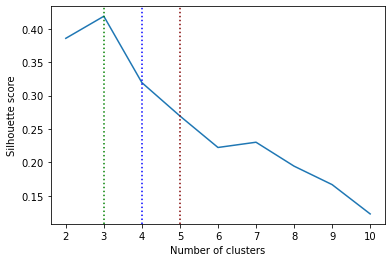

In [31]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_df_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))
    
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### INFERENCES:

- The silhouette score is maximum when k is 2 which is 0.47
- 2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

- 3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.
- Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better `cluster profiling`

## 4.2 Iterating with k=3,4 and 5

In [32]:
# Function for all steps of Kmean Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(country_df_scaled)
    country_df_kmean = country_df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis

In [33]:
# Created Models are available globally to access inside cluster profiling functions
k_3_model = K_means_model(3) # K means model with 3 clusters
k_4_model = K_means_model(4) # K means model with 4 clusters
k_5_model = K_means_model(5) # K means model with 5 clusters

Number of countries in each cluster(k=3):
1    11
0     3
2     1
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=4):
0    9
1    3
3    2
2    1
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=5):
3    7
2    3
4    2
0    2
1    1
Name: k_means_cluster_label, dtype: int64


### Cluster Analysis:

We can see that when there are 3 or 4 clusters, there are some distribution of countries. When there are 5 clusters, there is a country which is in a separate cluster. This would make actionable items a bit tedious. We will progress with these 3 models and profile the clusters created by each model based on 3 important parameters i.e **GDPP, Income and Child_mortality** and see which is a good value of k.

In [34]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['orange','blue','green','red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_5_model, palette=['red','orange','maroon','green','blue'])

### Visualization of GDPP vs Income when k=3,4,5

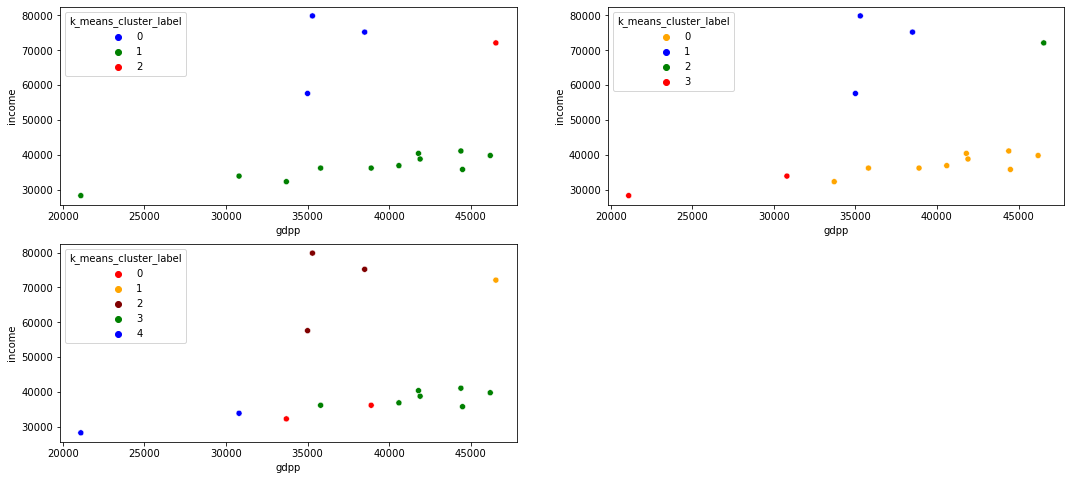

In [35]:
clusters_scatter_plots('gdpp','income')

### INFERENCES:

- When there are 3 or 4 clusters, there is a distinct separation of the clusters.
- When there are 5 clusters, as we have seen previously that one of the clusters has just one country, it cannot be seen evidently here.

Lets visualize the clusters more and see which helps in understanding the clusters and identifying countries in need.

### Visualization of GDPP vs Child mortality when k=3,4,5

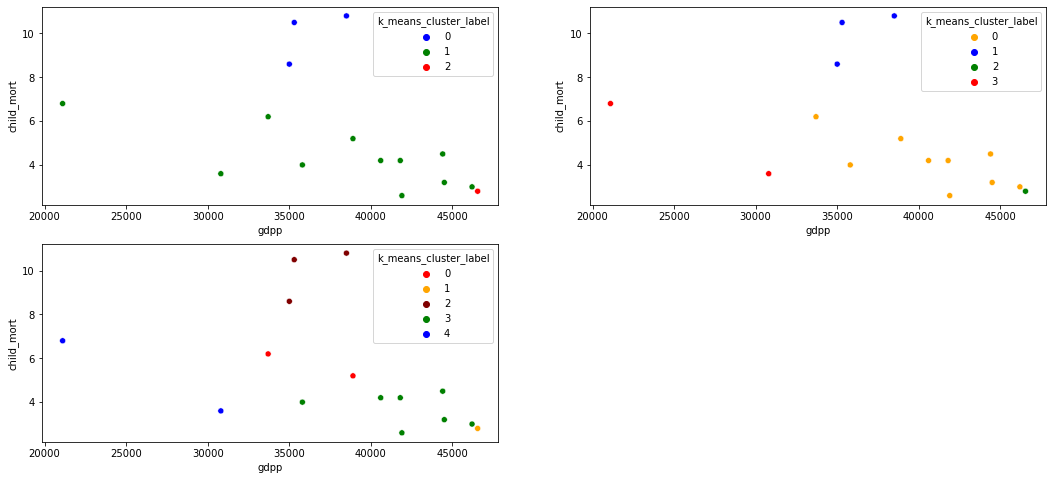

In [36]:
clusters_scatter_plots('gdpp','child_mort')

### INFERENCES:

This plot is very helpful to see the clustered groups. For e.g. when k=3, we see that cluster 2 require aid as their gdpp is low and child mortality is pretty high.

As the cluster labels are picked in random and assigned, we can see similar group is represented as 3 when k=4 and k=5.

### Visualization of Child mortality vs Income when k=3,4,5

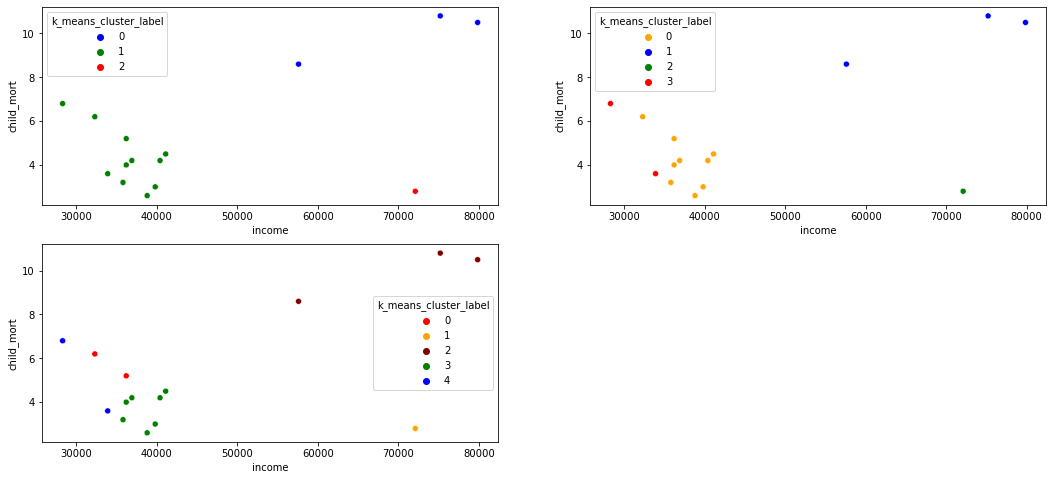

In [37]:
clusters_scatter_plots('income','child_mort')

### INFERENCES:

As we saw in previous two scatter plots, we can see that same cluster which had bad child_moratality rate and low gdpp has low income in this plot.

### 4.3 Final Model: K-means clustering with K =3 `

Now that we have solved the biggest challenge in K-means algorithm i.e. Find the optimal value of k, we can build our final model using k=3. Lets run `K-means` algorithm on the scaled data set as the clustering takes Euclidean distance as a measure

In [38]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(country_df_scaled)

KMeans(n_clusters=3, random_state=50)

#### Creating Cluster labels using K-means
Since scaled data will be a bit confusing while explaining to business people, we will copy the actual data into a new dataframe to explain the cluster labels. We will use this `country_df_kmean_3` for cluster profiling. Lets create a column called `k_means_cluster_label` and concatenate to the `country_df_kmean_3` to assign the countries with the cluster labels.

In [39]:
country_df_kmean = country_df.copy() # copy df into new df, as the same df will be used for hierarchical clustering too.
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

,k_means_cluster_label
0,0
1,1
2,0
3,0
4,0


In [40]:
country_df_kmean = pd.concat([country_df_kmean, label], axis =1)
country_df_kmean.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
0,15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
1,23,Brunei,10.5,23792.2,1002.52,9884.0,79844,16.700,77.1,1.84,35300,1
2,42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
3,53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,0
4,54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,0


### 4.4 INITIAL CLUSTER PROFILING

- `value_counts` shows how many countries are clustered under each cluster label. 
- Lets analyse these 3 clusters and see if we can profile these clusters by comparing their `gdpp`, `child_mort`, `income`
- Lets visualize these clusters using `scatter plots`, `barplots` and `boxplots`
- We also need to analyse the clusters and see if k=3 helps us to identify the countries which are in dire need of aid

In [41]:
country_df_kmean.k_means_cluster_label.value_counts()

0    11
1     3
2     1
Name: k_means_cluster_label, dtype: int64

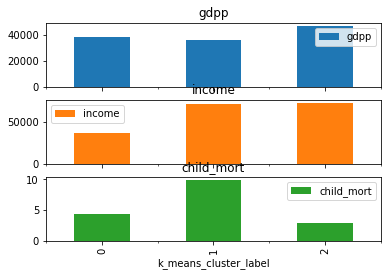

In [42]:
# Profiling GDP, INCOME AND CHID_MORT in separate plots

grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<AxesSubplot:xlabel='k_means_cluster_label'>

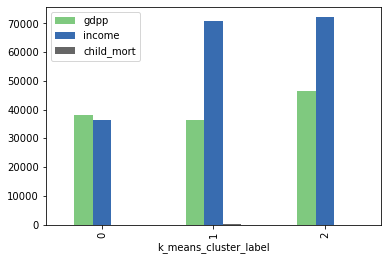

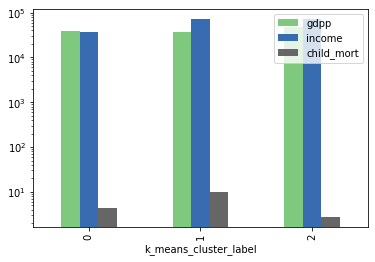

In [43]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

### INFERENCES:

From the above three plots, We can see that the clusters are grouped as
- 0 : Medium GDPP, medium Income and mild child mortality rate.
- 1 : High GDPP, High income and very low child mortality rate.
- 2 : Low GDPP, Low income and very high mortality rate.

# 5 Build unsupervised model using Hierarchical Clustering


- We have built an unsupervised model using K-means algorithm. Now lets create a model to cluster the countries using `Hierarchical Clustering`. 
- Hierarchical clustering starts by treating each observation as a separate cluster. 
- Then, it repeatedly executes the following two steps: 
  1. identify the two clusters that are closest together
  2. merge the two most similar clusters. 
  
This iterative process continues until all the clusters are merged together. The main output of Hierarchical Clustering is a `dendrogram`, which shows the hierarchical relationship between the clusters

### Linkage Criteria

- There are multiple linkage criteria which determines from where `Euclidean distance` is computed. 
- It can be computed between 
  - The two most similar parts of a cluster in a **single-linkage**
  - The two least similar bits of a cluster in a **complete-linkage
  - The center of the clusters in a mean or average-linkage
  
We will do both single and complete linkages here and try to interpret their dendograms.

## 5.1 Single linkage

In [44]:
country_df_scaled

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-1.535653,-0.324527,0.578654,1.201151,0.796861,-0.277946,-0.403459,-0.145533,0.347891,0.931015
1,-1.347422,1.975271,0.028790,-1.482365,-0.620399,2.099467,2.469159,-1.768780,0.288638,-0.466183
2,-0.900372,-0.669497,-0.423428,-0.883674,-0.144018,-0.719753,-0.378260,-0.201507,-0.955663,-1.157106
3,-0.641555,-0.899477,-0.292180,0.760208,-0.170266,-0.357717,-0.699831,-0.145533,0.377517,1.207384
4,-0.618026,-0.439517,-0.672092,1.258855,-0.527595,-0.535667,-0.564341,0.638104,0.851537,0.347570
5,-0.523910,-0.439517,-0.302929,1.269569,-0.278070,-0.320899,-0.620940,-0.089558,-1.044542,0.531816
6,-0.288621,-1.052796,-0.048163,0.619671,-0.117679,-0.419079,0.292405,0.973948,1.355182,0.547170
7,-0.123919,-0.516177,-0.773017,0.242474,-0.629311,-0.578620,-0.706033,0.806026,-0.837158,-0.389414
8,-0.076861,-0.822817,-0.900400,0.823318,-0.853659,-0.603165,-1.136151,1.421741,-1.044542,0.946369
9,0.040783,2.090261,0.131240,-1.475185,-0.509613,1.814502,1.403073,-1.153065,1.380661,0.025139


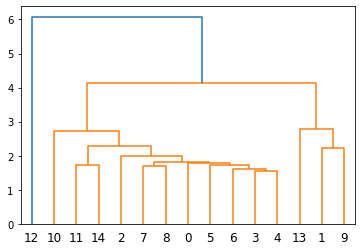

In [45]:
# single linkage

mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### INTERPRETATION OF DENDOGRAM:

Single linkage's dendogram is not readable or interpretable. Hence we cannot use this for our problem.

Lets try with complete linkage and see if it helps

## 5.2 Complete Linkage:

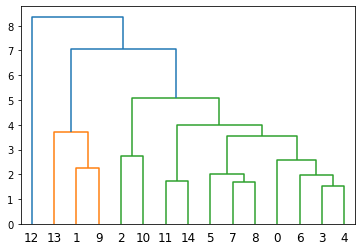

In [46]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.rcParams["figure.figsize"] = (10,20)
plt.savefig('cluster_1.png') 
plt.show()


### INTERPRETATION OF DENDOGRAM:

Complete linkage's dendogram is readable and better to interpret when compared to single linkage's dendogram.

We can see merging of clusters represented in different colors.

If we cut the dendogram tree at SCORE 5 or 6, we have 4 clusters. But we can see the dissimilarity between 4 clusters and 3 clusters is not much as at score 8 itself, we see 3 clusters forming. Only at higher score of 12, 2 sets of clusters available. 

This indicates 3 clusters is a good choice as there will be good dissimilarity between clusters and good similarity within clusters.

In [47]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [48]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
1,23,Brunei,10.5,23792.2,1002.52,9884.0,79844,16.700,77.1,1.84,35300,1
2,42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0
3,53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,0
4,54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,0


From the above plots, its evident that the cluster labels 
- 0 : Under-developed countries having low GDPP, low income and high child mortality rate.
- 1 : Developing countries having medium GDPP, medium income and mild child mortality rate.
- 2 : Developed countries having high GDPP, high income and very low child mortality rate.